# Linear Regression (선형회귀)

- 정의
  - 여러 개의 예측 변수와 하나의 결과 변수 사이에 선형 관계 (Linear Relationship)가 존재한다는 가정하에 그러한 변수 사이의 선형 구조를 *모형화* 하는 것
  - 결과 변수의 값을 다른 예측 변수들로 부터 설명하고 예측하는 것
- 변수의 종류
  - 결과 변수 (Outcome variable): 반응 변수 (Response Variable), 종속 변수 (Dependent Variable), 분류명 (Classified Name)
  - 예측 변수 (Predictor): 설명 변수 (Explanatory Variable), 독립 변수 (Independent Variable), 특징 (Feature)
- 선형 모형을 만드는 이유
  - 미래의 결과를 예측하기 위해
  - 어떠한 상황을 이해하거나 설명하기 위해
  - 회사의 매출액과 광고에 쓰는 비용간의 관계를 설명하기 위해
  - SNS에서 임의의 이용자의 친구 숫자와 그 사용자가 SNS에서 보내는 시간 간의 관계를 알아볼 때  
  
- 수학적 정의
  - 통계적 수치를 지니고 있는 $p$-벡터 $X_i=\{x_{i1}, x_{i2}, ..., x_{ip}\}$ 및 이 $p$-벡터와 연관된 실수 값 $y_i$을 고려하여,
  - $n$개의 통계적 수치 $\{y_i, x_{i1}, x_{i2}, ..., x_{ip}\}_{i=1}^n$가 주어질 때
  - 새로운 통계 수치 벡터 $X=\{x_1, x_2, ..., x_p\}$와 연관된 $\hat{y}$를 예측하기 위하여, 벡터 $X$와 $\hat{y}$사이의 다음과 같은 선형관계 모형을 개발하는 기법 $$ $$ $$\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + ... + w_p x_p$$ $$$$
  - 위 식에서 $w_0$는 인터셉트(intercept) 라고 부르며, $W=(w_1, w_2, ..., w_p)$는 계수 벡터(Coefficient Vector)라고 부른다. 

- 인터셉트 $w_0$ 및 계수 벡터 $W$를 구하는 수학적 모델
  - 주어진 통계적 수치들에 대해 다음 식을 만족하는 값을 구한다. $$$$ $$\min_{w_0, W} \sum_{i=1}^n || w_0 + W\cdot X_i - y_i ||^2$$

## 1. Linear Regression (단일 변수 선형 회귀)

### 1) 필요한 모듈을 지역 이름 공간에 불러오기

In [10]:
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 2) 통계 수치 데이터 정의 및 Pandas를 활용한 데이터프레임 정의
- 최고 기온과 에어콘 판매 대수 데이터 (다소 극단적인 예) 

In [12]:
data = {
    'Temperature': [26, 27, 28, 29, 30, 31, 32, 33],
    'Number of Sells': [270, 280, 290, 300, 310, 320, 330, 340]
}
df = DataFrame(data)

In [13]:
df

,Number of Sells,Temperature
0,270,26
1,280,27
2,290,28
3,300,29
4,310,30
5,320,31
6,330,32
7,340,33


In [14]:
df['Temperature'].values

array([26, 27, 28, 29, 30, 31, 32, 33])

In [15]:
df['Number of Sells'].values

array([270, 280, 290, 300, 310, 320, 330, 340])

### 3) 통계 수치에 대한 Scatter Plot 생성

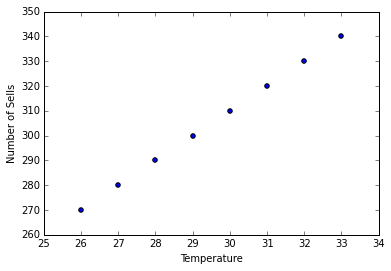

In [16]:
df.plot(kind="scatter", x="Temperature", y="Number of Sells")

### 4) scipy 모듈을 활용한 선형 회귀 분석

In [17]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Temperature'].values, df['Number of Sells'].values)

In [18]:
print "slope: ", slope, ", intercept: ", intercept, ", r_value: ", r_value, ", p_value: ", p_value, ", std_err: ", std_err

slope:  10.0 , intercept:  10.0 , r_value:  1.0 , p_value:  2.5e-60 , std_err:  0.0


### 5) 선형 회귀식 및 예측

- 회귀식: $y = 10 + 10x$

- 질문: 온도가 34일 때 예상 에어콘 판매량은? $10 + 10 * 34 = 350$

## 2. 실제 통계 데이터를 활용한 선형 회귀

### 1) 데이터 설명
- D: 사망률
- A1 ~ A15: 사망률에 영향이 있을 것 같은 각종 요인 데이터
- References
  - Richard Gunst and Robert Mason, Regression Analysis and Its Applications: a data-oriented approach, Dekker, 1980, pages 370-371
  - Gary McDonald and Richard Schwing, Instabilities of regression estimates relating air pollution to mortality, Technometrics, Volume 15, Number 3, pages 463-482, 1973.
  - Helmut Spaeth, Mathematical Algorithms for Linear Regression, Academic Press, 1991, ISBN 0-12-656460-4.
    
- The death rate is to be represented as a function of other variables.
- There are 60 rows of data. The data includes:
  - I: the index;
  - A1: the average annual precipitation;
  - A2: the average January temperature;
  - A3: the average July temperature;
  - A4: the size of the population older than 65;
  - A5: the number of members per household;
  - A6: the number of years of schooling for persons over 22;
  - A7: the number of households with fully equipped kitchens;
  - A8: the population per square mile; 
  - A9: the size of the nonwhite population;
  - A10: the number of office workers;
  - A11: the number of families with an income less than $3000;
  - A12: the hydrocarbon pollution index;
  - A13: the nitric oxide pollution index;
  - A14: the sulfur dioxide pollution index;
  - A15: the degree of atmospheric moisture.
  - D: the death rate.

### 2) Pandas를 활용한 데이터프레임 정의

In [23]:
import urllib2
import json

path = 'https://raw.githubusercontent.com/bluebibi/python-for-data-analysis/master/data_science/death_rate.csv'
raw_csv = urllib2.urlopen(path)
df = pd.read_csv(raw_csv)

In [29]:
df.head()

,I,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,D
0,1,36,27,71,8.1,3.34,11.4,81.5,3243,8.8,42.6,11.7,21,15,59,59,0.921
1,2,35,23,72,11.1,3.14,11.0,78.8,4281,3.6,50.7,14.4,8,10,39,57,0.997
2,3,44,29,74,10.4,3.21,9.8,81.6,4260,0.8,39.4,12.4,6,6,33,54,0.962
3,4,47,45,79,6.5,3.41,11.1,77.5,3125,27.1,50.2,20.6,18,8,24,56,0.982
4,5,43,35,77,7.6,3.44,9.6,84.6,6441,24.4,43.7,14.3,43,38,206,55,1.071


### 3) 중요 요인 선택: A1

In [25]:
df2 = df[['A1','D']]

In [30]:
df2.head()

,A1,D
0,36,0.921
1,35,0.997
2,44,0.962
3,47,0.982
4,43,1.071


### 4) 통계 수치에 대한 Scatter Plot 생성

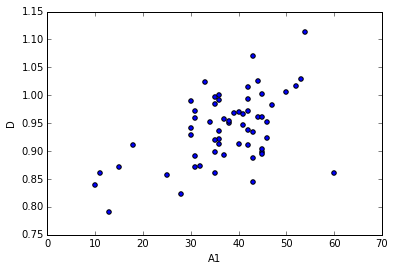

In [32]:
fig = df2.plot(kind="scatter", x="A1", y="D")

### 5) scipy 모듈을 활용한 선형 회귀 분석

In [33]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['A1'].values, df['D'].values)

In [67]:
print "slope: ", slope, ", intercept: ", intercept, ", r_value: ", r_value, ", p_value: ", p_value, ", std_err: ", std_err

slope:  0.00318278570538 , intercept:  0.820936574142 , r_value:  0.510589815446 , p_value:  3.07228582512e-05 , std_err:  0.000703770456645


### 6) 선형 회귀식 및 예측

 - 연간 강수량 (A1)과 사망률간의 관계: $y = 0.82 + 0.003 * x$
    
 - 강수량이 70일 때 사망률은? $0.82 + 0.003 * 70 = 1.03$

### 7) 선형 회귀식과 Scatter Plot을 함께 생성

In [69]:
fig = plt.figure()
ax = fig.add_subplot?

In [ ]:
ax = fig.add_subplot

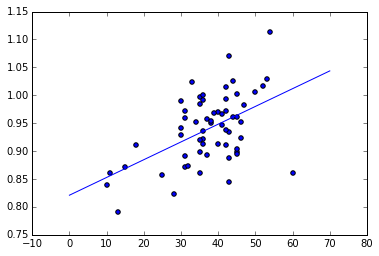

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df2['A1'], df2['D'])

line_plot_x = np.linspace(0,70,10)
ax.plot(line_plot_x, intercept + slope * line_plot_x)

## 3. sklearn 모듈을 활용한 다중 변수 선형 회귀

In [43]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

### 1) 1월달 온도(A2)와 7월달 온도(A3)에 대한 사망률 변화

In [53]:
X = zip(df['A2'], df['A3'])
X[1:5]

[(23, 72), (29, 74), (45, 79), (35, 77)]

In [54]:
regr.fit(X, df['D'])

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

('Coefficients:', array([-0.00083917,  0.00430378]))
('Intercept:', 0.64802157350732881)


In [60]:
# The mean square error
print("Residual sum of squares: %.5f" % np.mean((regr.predict(X) - df['D']) ** 2))

Residual sum of squares: 0.00342


### 2) 선형 회귀식 및 예측

- 선형 회귀식: $y = 0.6480 - 0.0008 * A2 + 0.0043 * A3$ 

In [49]:
test_x = [20, 90]
print regr.predict(test_x)
print 0.6480 - 0.0008 * 20 + 0.0043 * 90

[ 1.01857871]
1.019


### 3) Scatter Plot 및 선형 회귀 Plane 생성

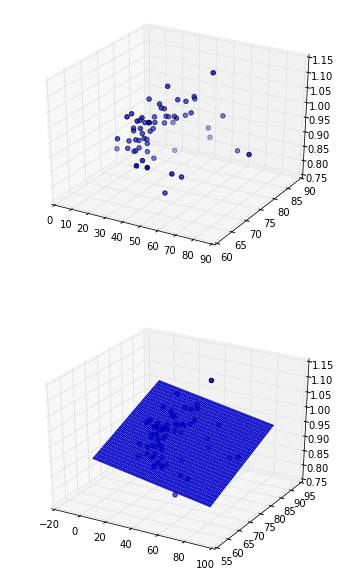

In [93]:
# Plot outputs
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 10))
ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(df['A2'], df['A3'], df['D'])

ax2 = fig.add_subplot(212, projection='3d')
ax2.scatter(df['A2'], df['A3'], df['D'])
# create x,y
xx, yy = np.meshgrid(range(0,90), range(60,90))
# calculate corresponding z
z = 0.6480 - 0.0008 * xx + 0.0043 * yy
ax2.plot_surface(xx, yy, z, rstride=1, cstride=1, linewidth=0)